## Entrenamiento  y evaluación de los mejores modelos

En este documento se incluye en el entrenamiento y la evaluación de las mejores versiones (en función de resultados obtenidos) de los modelos entrenados. Los detalles de las pruebas y las diferentes versiones de cada uno de ellos están recogidas en la subcarpeta "testing". 

------

Librerias comunes

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

Dataset para train

In [46]:
df = pd.read_csv("../data/train/train.csv")

Dataset para test (datos no vistos)

In [47]:
df_test = pd.read_csv("../data/test/test.csv")

Dataset con canciones actuales

### Información general de los datasets

In [48]:
df.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,version_Remix,version_type_encoded,decade,decade_range,energy_danceability_valence,acoustic_intensity,popularity_energy_ratio,valence_energy_dif,decade_label,popularity_normalized
0,1xUJ1mdLAysxNBtO9w3J2g,Stompin At The Savoy,['Benny Goodman'],195533,1/1/90,1990,0.836,0.5250,0.222,0.079900,...,0,1,1990,90s-00s,0.075175,-9.250340,225.215080,0.4230,2,0.370632
1,62fX8EW16l8St2yL8rMer9,In My Room - Remastered,['The Beach Boys'],134133,9/16/63,1963,0.184,0.3410,0.416,0.000063,...,0,2,1960,50s-60s,0.070786,-1.761616,129.804572,0.0830,0,2.548527
2,0vTrXo9zLWib36Us8BQ4sN,State Of Independence - Single Version,['Jon & Vangelis'],262107,1/1/84,1984,0.148,0.7520,0.652,0.045500,...,0,1,1980,70s-80s,0.428526,-1.941760,59.815034,0.2220,1,0.272035
3,23IoCDFHoz1uM5XELOSg1U,Chandni Raaten Pyar Ki Baaten,"['Hemant Kumar', 'Lata Mangeshkar']",208973,12/1/52,1952,0.990,0.3110,0.253,0.000156,...,0,1,1950,50s-60s,0.033204,-11.814660,43.476542,0.1690,0,-0.478555
4,5ZrtPphrWFzzamKn3jSnv9,"Adagio for Strings, Op. 11","['Samuel Barber', 'Philadelphia Orchestra', 'E...",463347,1955,1955,0.910,0.0626,0.129,0.780000,...,0,1,1950,50s-60s,0.000281,-19.532240,302.302147,-0.0942,0,1.492568


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95958 entries, 0 to 95957
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           95958 non-null  object 
 1   name                         95958 non-null  object 
 2   artists                      95958 non-null  object 
 3   duration_ms                  95958 non-null  int64  
 4   release_date                 95958 non-null  object 
 5   year                         95958 non-null  int64  
 6   acousticness                 95958 non-null  float64
 7   danceability                 95958 non-null  float64
 8   energy                       95958 non-null  float64
 9   instrumentalness             95958 non-null  float64
 10  liveness                     95958 non-null  float64
 11  loudness                     95958 non-null  float64
 12  speechiness                  95958 non-null  float64
 13  tempo           

In [50]:
df_test.head(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,version_Remix,version_type_encoded,decade,decade_range,energy_danceability_valence,acoustic_intensity,popularity_energy_ratio,valence_energy_dif,decade_label,popularity_normalized
0,3x9WAJIEhsY8Eg5lwu1Z4A,Multiply (feat. Nate Dogg),"['Xzibit', 'Nate Dogg']",248107,10/1/02,2002,0.0285,0.915,0.719,0.000000,...,0,1,2000,90s-00s,0.525650,-0.182714,58.413652,0.0800,2,-0.480925
1,3H67q7a5uZr07zYTM18i6m,Un Millón De Lágrimas,['Tropical Panamá'],173787,1/1/92,1992,0.2260,0.667,0.579,0.020200,...,0,1,1990,90s-00s,0.361863,-1.688446,70.810521,0.3580,2,-0.587369
2,07wbIsFWkJSfkbVFSsp7Ne,Rhayader Goes To Town,['Camel'],320387,4/15/75,1975,0.2530,0.373,0.423,0.527000,...,0,1,1970,70s-80s,0.067056,-3.181981,85.104371,0.0020,1,-0.002346
3,53RYTfkLiyZuUZHwJC3Wmm,We Suck Young Blood,['Radiohead'],296707,2003,2003,0.8780,0.135,0.239,0.029200,...,0,1,2000,90s-00s,0.001220,-9.723850,192.460567,-0.2012,2,-0.055146
4,0htijg4vyYMkezwrLaUkkE,Cariño Santo - Version 1980,['Los Baron De Apodaca'],214880,1/1/80,1980,0.5960,0.678,0.465,0.000012,...,0,1,1980,70s-80s,0.240866,-3.349520,49.461302,0.2990,1,-1.191329


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23990 entries, 0 to 23989
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           23990 non-null  object 
 1   name                         23990 non-null  object 
 2   artists                      23990 non-null  object 
 3   duration_ms                  23990 non-null  int64  
 4   release_date                 23990 non-null  object 
 5   year                         23990 non-null  int64  
 6   acousticness                 23990 non-null  float64
 7   danceability                 23990 non-null  float64
 8   energy                       23990 non-null  float64
 9   instrumentalness             23990 non-null  float64
 10  liveness                     23990 non-null  float64
 11  loudness                     23990 non-null  float64
 12  speechiness                  23990 non-null  float64
 13  tempo           

In [52]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'artists_frequency', 'version_type',
       'base_name', 'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'version_type_encoded', 'decade', 'decade_range',
       'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif', 'decade_label',
       'popularity_normalized'],
      dtype='object')

------

### DecisionTreeClassifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
X_dt = df[['duration_ms', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'mode',
       'key', 'energy_danceability_valence', 'acoustic_intensity',
       'valence_energy_dif', 'popularity_normalized']]
y_dt = df['decade_label']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, train_size=0.2, random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

param_grid = {'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

print("Accuracy:", accuracy_dt)
print("Precisión (Precision):", precision_dt)
print("Sensibilidad (Recall):", recall_dt)
print("F1-Score:", f1_dt)


Accuracy: 0.6810608725103234
Precisión (Precision): 0.6811084577013263
Sensibilidad (Recall): 0.6810201914543216
F1-Score: 0.6807280821767087


In [56]:
#Cross-Validation
cv_scores_dt = cross_val_score(best_model_dt, X_train, y_train, cv=5, scoring='accuracy')
print("Scores de validación cruzada:", cv_scores_dt)
print("Media de scores:", cv_scores_dt.mean())

Scores de validación cruzada: [0.6689242  0.66492965 0.61985409 0.63652944 0.60291819]
Media de scores: 0.6386311139031261


#### Validación en datos no vistos

In [57]:
X_dt_nuevo = df_test[['duration_ms', 'instrumentalness',
       'liveness', 'speechiness', 'tempo', 'mode',
       'key', 'energy_danceability_valence', 'acoustic_intensity',
       'valence_energy_dif', 'popularity_normalized']]
y_dt_nuevo = df_test['decade_label']

In [58]:
y_nuevos_dt_pred = best_model_dt.predict(X_dt_nuevo)
accuracy = accuracy_score(y_dt_nuevo, y_nuevos_dt_pred)
precision = precision_score(y_dt_nuevo, y_nuevos_dt_pred, average='macro')
recall = recall_score(y_dt_nuevo, y_nuevos_dt_pred, average='macro')
f1 = f1_score(y_dt_nuevo, y_nuevos_dt_pred, average='macro')

print("Rendimiento en datos no vistos:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Rendimiento en datos no vistos:
Accuracy: 0.683451438099208
Precision: 0.6836298064447601
Recall: 0.6834832603254068
F1-Score: 0.6832502155459949


In [59]:
#Classification Report
print("\nReporte de clasificación:")
print(classification_report(y_dt_nuevo, y_nuevos_dt_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      7990
           1       0.61      0.62      0.62      8000
           2       0.71      0.67      0.69      8000

    accuracy                           0.68     23990
   macro avg       0.68      0.68      0.68     23990
weighted avg       0.68      0.68      0.68     23990



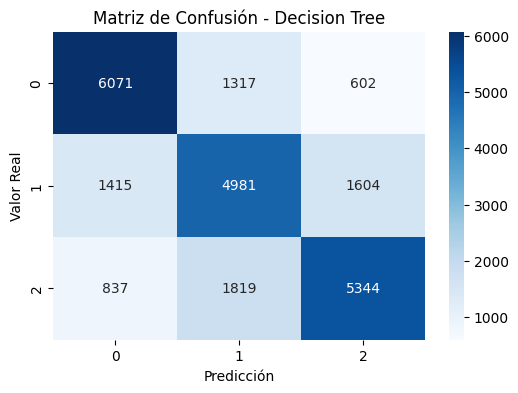

In [60]:
#Confusion Matrix
conf_matrix_dt = confusion_matrix(y_dt_nuevo, y_nuevos_dt_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=best_model_dt.classes_, yticklabels=best_model_dt.classes_)
plt.title('Matriz de Confusión - Decision Tree')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [61]:
#Predict Proba
y_pred_proba_dt = best_model_dt.predict_proba(X_dt_nuevo)

#Ejemplo de probabilidades para las primeras 5 observaciones
print("Probabilidades para las primeras 5 observaciones:")
print(y_pred_proba_dt[:5])


Probabilidades para las primeras 5 observaciones:
[[0.  0.  1. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.5 0.5 0. ]
 [0.  1.  0. ]]


------

### RandomForestClassifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
X_rf = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'version_type_encoded', 'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif',
       'popularity_normalized']]
y_rf = df['decade_label']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

importances = model_rf.feature_importances_
importance_rf = pd.DataFrame({'Feature': X_rf.columns, 'Importance': importances})
importance_rf = importance_rf.sort_values(by='Importance', ascending=False)

top_features = importance_rf.head(10)['Feature'].values
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

importance_rf

,Feature,Importance
15,popularity_energy_ratio,0.224843
17,popularity_normalized,0.154620
3,energy,0.083715
1,acousticness,0.082781
6,loudness,0.077048
14,acoustic_intensity,0.072058
0,duration_ms,0.053797
16,valence_energy_dif,0.040435
13,energy_danceability_valence,0.034707
2,danceability,0.030168


In [92]:
X_filtered_rf = df[['duration_ms', 'acousticness', 'danceability', 'energy',
                 'loudness', 'popularity_normalized']]
y_rf = df['decade_label']

In [93]:
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered_rf, y_rf, test_size=0.2, random_state=42)

model_filtered_rf = RandomForestClassifier(random_state=42)
model_filtered_rf.fit(X_train_filtered, y_train_filtered)

y_pred_filtered_rf = model_filtered_rf.predict(X_test_filtered)

accuracy_rf = accuracy_score(y_test_filtered, y_pred_filtered_rf)
precision_rf = precision_score(y_test_filtered, y_pred_filtered_rf, average='macro')
recall_rf = recall_score(y_test_filtered, y_pred_filtered_rf, average='macro')
f1_rf = f1_score(y_test_filtered, y_pred_filtered_rf, average='macro')

print("Accuracy:", accuracy_rf)
print("Precisión (Precision):", precision_rf)
print("Sensibilidad (Recall):", recall_rf)
print("F1-Score:", f1_rf)

Accuracy: 0.7155585660691955
Precisión (Precision): 0.7143357337480377
Sensibilidad (Recall): 0.715004720389678
F1-Score: 0.7121594077213032


In [85]:
#Cross-Validation
cv_scores_rf = cross_val_score(model_filtered_rf, X_train_filtered, y_train_filtered, cv=5, scoring='accuracy')
print("Scores de validación cruzada:", cv_scores_rf)
print("Media de scores:", cv_scores_rf.mean())

Scores de validación cruzada: [0.70724241 0.71282486 0.7100241  0.70657201 0.71347619]
Media de scores: 0.7100279132102859


#### Validación en datos no vistos

In [94]:
X_rf_nuevo = df_test[['duration_ms', 'acousticness', 'danceability', 'energy',
                 'loudness', 'popularity_normalized']]
y_rf_nuevo = df_test['decade_label']

y_nuevos_rf_pred = model_filtered_rf.predict(X_rf_nuevo)
accuracy = accuracy_score(y_rf_nuevo, y_nuevos_rf_pred)
precision = precision_score(y_rf_nuevo, y_nuevos_rf_pred, average='macro')
recall = recall_score(y_rf_nuevo, y_nuevos_rf_pred, average='macro')
f1 = f1_score(y_rf_nuevo, y_nuevos_rf_pred, average='macro')

print("Rendimiento en datos no vistos:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Rendimiento en datos no vistos:
Accuracy: 0.7192163401417258
Precision: 0.7184303709583912
Recall: 0.7192696078431372
F1-Score: 0.7167345638408529


In [69]:
#Classification Report
print("\nReporte de clasificación:")
print(classification_report(y_rf_nuevo, y_nuevos_rf_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      7990
           1       0.67      0.64      0.65      8000
           2       0.75      0.68      0.71      8000

    accuracy                           0.72     23990
   macro avg       0.72      0.72      0.72     23990
weighted avg       0.72      0.72      0.72     23990



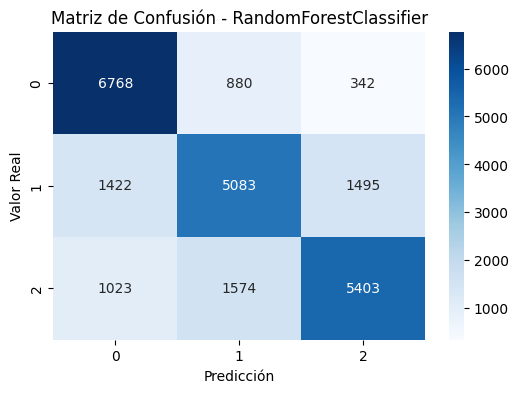

In [95]:
#Confusion Matrix
conf_matrix_rf = confusion_matrix(y_rf_nuevo, y_nuevos_rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_filtered_rf.classes_, yticklabels=model_filtered_rf.classes_)
plt.title('Matriz de Confusión - RandomForestClassifier')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [96]:
#Predict Proba
y_pred_proba_rf = model_filtered_rf.predict_proba(X_rf_nuevo)

#Ejemplo de probabilidades para las primeras 5 observaciones
print("Probabilidades para las primeras 5 observaciones:")
print(y_pred_proba_rf[:5])

Probabilidades para las primeras 5 observaciones:
[[0.   0.09 0.91]
 [0.06 0.26 0.68]
 [0.07 0.77 0.16]
 [0.41 0.2  0.39]
 [0.07 0.34 0.59]]


------

### XGBoost

In [101]:
from xgboost import XGBClassifier

In [102]:
#Variables seleccionadas tras haber aplicado feature importances
X_xgb = df[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
          'loudness', 'speechiness', 'valence', 'tempo', 'popularity_normalized']]
y_xgb = df['decade_label']

X_train, X_test, y_train, y_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

print(X_xgb.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print("Accuracy:", accuracy_xgb)
print("Precisión (Precision):", precision_xgb)
print("Sensibilidad (Recall):", recall_xgb)
print("F1-Score:", f1_xgb)

(95958, 10)
(76766, 10)
(19192, 10)
(76766,)
(19192,)
Accuracy: 0.9950500208420175
Precisión (Precision): 0.9950476807747467
Sensibilidad (Recall): 0.9950545454231823
F1-Score: 0.9950506571199323


In [103]:
#Cross-Validation
cv_scores_xgb = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='accuracy')
print("Scores de validación cruzada:", cv_scores_xgb)
print("Media de scores:", cv_scores_xgb.mean())

Scores de validación cruzada: [0.99505015 0.99628737 0.9957663  0.99667817 0.99589657]
Media de scores: 0.995935712236699


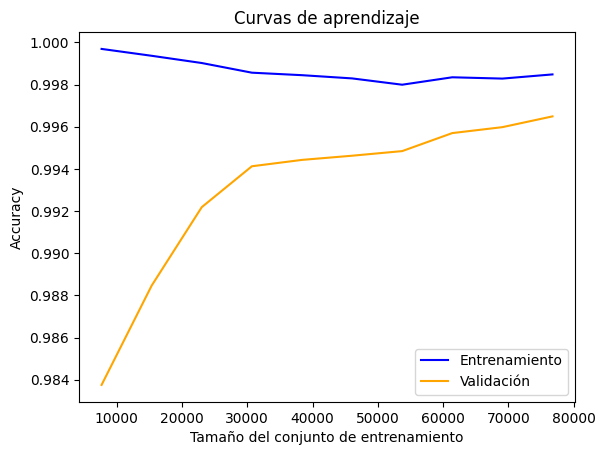

In [100]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model_xgb, X_xgb, y_xgb, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Entrenamiento", color="blue")
plt.plot(train_sizes, test_mean, label="Validación", color="orange")
plt.title("Curvas de aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [74]:
param_grid = {
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 10, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100]}

model_xgb_2 = XGBClassifier(random_state=42)


grid_search_xgb = GridSearchCV(estimator=model_xgb_2, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search_xgb.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search_xgb.best_params_)

best_model_xgb = grid_search_xgb.best_estimator_
y_pred = best_model_xgb.predict(X_test)


print("Accuracy en prueba:", accuracy_score(y_test, y_pred))

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1}
Accuracy en prueba: 0.8861099170216369


<mark>**Conclusiones:**</mark>

- **Balance entre simplicidad y precisión:** Aunque el accuracy no es tan alto como en el modelo no hiperparametrizado, este modelo es más robusto debido a la regularización aplicada. Es menos probable que el modelo hiperparametrizado dependa excesivamente de características específicas o sesgadas.

- **Menor riesgo de sobreajuste:** La hiperparametrización y regularización aseguran que el modelo generalice bien a datos nuevos. Este modelo puede ser más confiable cuando se introducen canciones con métricas atípicas o distribuciones diferentes.

- **Compromiso con la complejidad:** Es posible que el modelo esté sacrificando un poco de precisión para garantizar generalización.

#### Evaluación en datos no vistos

In [75]:
X_xgb_nuevo = df_test[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
          'loudness', 'speechiness', 'valence', 'tempo', 'popularity_normalized']]
y_xgb_nuevo = df_test['decade_label']

y_nuevos_pred_xgb = best_model_xgb.predict(X_xgb_nuevo)

accuracy_xgb_nuevo = accuracy_score(y_xgb_nuevo, y_nuevos_pred_xgb)
precision_xgb_nuevo = precision_score(y_xgb_nuevo, y_nuevos_pred_xgb, average='macro')
recall_xgb_nuevo = recall_score(y_xgb_nuevo, y_nuevos_pred_xgb, average='macro')
f1_xgb_nuevo = f1_score(y_xgb_nuevo, y_nuevos_pred_xgb, average='macro')

print("Rencimiento en datos no vistos:")
print("Accuracy:", accuracy_xgb_nuevo)
print("Precision:", precision_xgb_nuevo)
print("Recall:", recall_xgb_nuevo)
print("F1-Score:", f1_xgb_nuevo)

Rencimiento en datos no vistos:
Accuracy: 0.8856606919549812
Precision: 0.8873316834882026
Recall: 0.8856699520233625
F1-Score: 0.8858937536760281


In [76]:
#Classification Report
print("\nReporte de clasificación:")
print(classification_report(y_xgb_nuevo, y_nuevos_pred_xgb))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7990
           1       0.89      0.87      0.88      8000
           2       0.93      0.88      0.90      8000

    accuracy                           0.89     23990
   macro avg       0.89      0.89      0.89     23990
weighted avg       0.89      0.89      0.89     23990



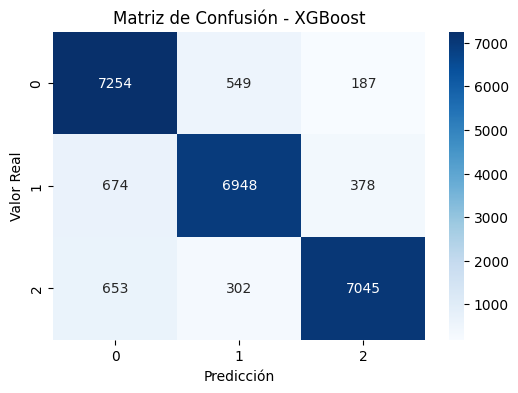

In [77]:
#Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_xgb_nuevo, y_nuevos_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=best_model_xgb.classes_, yticklabels=best_model_xgb.classes_)
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [78]:
#Predict Proba
y_pred_proba_xgb = best_model_xgb.predict_proba(X_xgb_nuevo)

#Ejemplo de probabilidades para las primeras 5 observaciones
print("Probabilidades para las primeras 5 observaciones:")
print(y_pred_proba_xgb[:5])

Probabilidades para las primeras 5 observaciones:
[[0.00204248 0.01971069 0.9782468 ]
 [0.03416822 0.12499619 0.8408356 ]
 [0.06387339 0.90163887 0.03448773]
 [0.32837    0.08237345 0.5892565 ]
 [0.01589487 0.49142948 0.49267566]]


------

### SVM

In [113]:
from sklearn.svm import SVC

In [114]:
#Debido a los tiempos de carga de este modelo se procedió a seleccionar una muestra de los datos.
sample_size = 20000
df_sample_svn = df.sample(n=sample_size, random_state=42)

X_svn = df_sample_svn[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'artists_frequency',
       'version_Live', 'version_Original', 'version_Remaster',
       'version_Remix', 'energy_danceability_valence', 'acoustic_intensity',
       'popularity_energy_ratio', 'valence_energy_dif', 'popularity_normalized']]
y_svn = df_sample_svn['decade_label']

In [115]:
# Cálculo de outliers
Q1 = X_svn.quantile(0.25)
Q3 = X_svn.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (X_svn < (Q1 - 1.5 * IQR)) | (X_svn > (Q3 + 1.5 * IQR))

print("Número de outliers por columna:")
print(outlier_mask.sum().sort_values(ascending=False))


print("\nPorcentaje de outliers por columna:")
print(((outlier_mask.sum() / len(X_svn)) * 100).sort_values(ascending=False))

Número de outliers por columna:
instrumentalness               4286
speechiness                    2545
artists_frequency              2038
popularity_energy_ratio        1816
version_Original               1569
liveness                       1465
explicit                        965
duration_ms                     957
version_Remaster                767
version_Live                    715
loudness                        515
acoustic_intensity              390
valence_energy_dif              339
popularity_normalized           327
tempo                           187
energy_danceability_valence     121
version_Remix                    87
popularity                        8
danceability                      8
energy                            0
acousticness                      0
mode                              0
key                               0
valence                           0
dtype: int64

Porcentaje de outliers por columna:
instrumentalness               21.430
speechiness     

In [116]:
X_scaled_svn = X_svn.copy()
scaler = StandardScaler()
X_scaled_svn = scaler.fit_transform(X_scaled_svn)
X_scaled_svn = pd.DataFrame(X_scaled_svn, columns=X_svn.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_svn, y_svn, test_size=0.2, random_state=42)

print(X_svn.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

k = 14
selector = SelectKBest(score_func=f_classif, k=k)

X_train_scaled_selected_svm = selector.fit_transform(X_train, y_train)
X_test_scaled_selected_svm = selector.transform(X_test)
selected_features = X_svn.columns[selector.get_support()]
print(f"Features seleccionadas con SelectKBest {selected_features}")


svm_model_5 = SVC(kernel='rbf', random_state=42, max_iter=20000)
svm_model_5.fit(X_train_scaled_selected_svm, y_train)

y_pred_5 = svm_model_5.predict(X_test_scaled_selected_svm)

accuracy_5 = accuracy_score(y_test, y_pred_5)
precision_5 = precision_score(y_test, y_pred_5, average='macro')
recall_5 = recall_score(y_test, y_pred_5, average='macro')
f1_5 = f1_score(y_test, y_pred_5, average='macro')

print("Accuracy:", accuracy_5)
print("Precision:", precision_5)
print("Recall:", recall_5)
print("F1-Score:", f1_5)

(20000, 24)
(16000, 24)
(4000, 24)
(16000,)
(4000,)
Features seleccionadas con SelectKBest Index(['duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'loudness', 'tempo', 'valence', 'popularity',
       'explicit', 'artists_frequency', 'energy_danceability_valence',
       'acoustic_intensity', 'valence_energy_dif'],
      dtype='object')
Accuracy: 0.76925
Precision: 0.7711815541179883
Recall: 0.7701532596565661
F1-Score: 0.7702906089051281


In [ ]:
warnings.filterwarnings("ignore")
param_grid = {
    'C': [0.1, 1, 10],    
    'gamma': [0.01, 0.1, 1], 
    'kernel': ['rbf']       
}

grid_search_svm = GridSearchCV(
    SVC(random_state=42, max_iter=20000),
    param_grid=param_grid,
    cv=3,                             
    scoring='accuracy',                  
    verbose=1                            
)

grid_search_svm.fit(X_train_scaled_selected_svm, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\Propietario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Propietario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Propietario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(max_iter=20000, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [120]:
print("Mejores Hiperparámetros:", grid_search_svm.best_params_)

Mejores Hiperparámetros: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [121]:
best_svm_model = grid_search_svm.best_estimator_
y_pred_best = best_svm_model.predict(X_test_scaled_selected_svm)

accuracy_best_svm = accuracy_score(y_test, y_pred_best)
precision_best_svm = precision_score(y_test, y_pred_best, average='macro')
recall_best_svm = recall_score(y_test, y_pred_best, average='macro')
f1_best_svm = f1_score(y_test, y_pred_best, average='macro')

print("\nResultados del modelo hiperparametrizado:")
print("Accuracy:", accuracy_best_svm)
print("Precision:", precision_best_svm)
print("Recall:", recall_best_svm)
print("F1-Score:", f1_best_svm)


Resultados del modelo hiperparametrizado:
Accuracy: 0.77225
Precision: 0.7740712619866471
Recall: 0.7731178969435261
F1-Score: 0.773214396737871


#### Evaluación en datos no vistos

In [122]:
X_nuevo_svm = df_test[['duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'loudness', 'tempo', 'valence', 'popularity',
       'explicit', 'artists_frequency', 'energy_danceability_valence',
       'acoustic_intensity', 'valence_energy_dif']]
y_nuevo_svm = df_test['decade_label']

In [123]:
Q1 = X_nuevo_svm.quantile(0.25)
Q3 = X_nuevo_svm.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (X_nuevo_svm < (Q1 - 1.5 * IQR)) | (X_nuevo_svm > (Q3 + 1.5 * IQR))

print("Número de outliers por columna:")
print(outlier_mask.sum().sort_values(ascending=False))


print("\nPorcentaje de outliers por columna:")
print(((outlier_mask.sum() / len(X_nuevo_svm)) * 100).sort_values(ascending=False))

Número de outliers por columna:
instrumentalness               5129
artists_frequency              2248
explicit                       1193
duration_ms                    1156
loudness                        576
acoustic_intensity              445
valence_energy_dif              437
tempo                           250
energy_danceability_valence     149
popularity                       16
danceability                      8
acousticness                      0
energy                            0
valence                           0
dtype: int64

Porcentaje de outliers por columna:
instrumentalness               21.379742
artists_frequency               9.370571
explicit                        4.972905
duration_ms                     4.818674
loudness                        2.401000
acoustic_intensity              1.854940
valence_energy_dif              1.821592
tempo                           1.042101
energy_danceability_valence     0.621092
popularity                      0.066694
danc

In [124]:
X_scaled_nuevo_svm = X_nuevo_svm.copy()
scaler = StandardScaler()
X_scaled_nuevo_svm = scaler.fit_transform(X_scaled_nuevo_svm)
X_scaled_nuevo_svm = pd.DataFrame(X_scaled_nuevo_svm, columns=X_nuevo_svm.columns)

In [ ]:
warnings.filterwarnings("ignore")
y_nuevos_pred_svm = best_svm_model.predict(X_scaled_nuevo_svm)

accuracy_svm_nuevo = accuracy_score(y_nuevo_svm, y_nuevos_pred_svm)
precision_svm_nuevo = precision_score(y_nuevo_svm, y_nuevos_pred_svm, average='macro')
recall_svm_nuevo = recall_score(y_nuevo_svm, y_nuevos_pred_svm, average='macro')
f1_svm_nuevo = f1_score(y_nuevo_svm, y_nuevos_pred_svm, average='macro')

print("Rencimiento en datos no vistos:")
print("Accuracy:", accuracy_svm_nuevo)
print("Precision:", precision_svm_nuevo)
print("Recall:", recall_svm_nuevo)
print("F1-Score:", f1_svm_nuevo)

c:\Users\Propietario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Rencimiento en datos no vistos:
Accuracy: 0.7587328053355565
Precision: 0.7607144954223642
Recall: 0.7587553712974552
F1-Score: 0.7594597229994445


In [126]:
#Classification Report
print("\nReporte de clasificación:")
print(classification_report(y_nuevo_svm, y_nuevos_pred_svm))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      7990
           1       0.67      0.68      0.67      8000
           2       0.76      0.79      0.77      8000

    accuracy                           0.76     23990
   macro avg       0.76      0.76      0.76     23990
weighted avg       0.76      0.76      0.76     23990



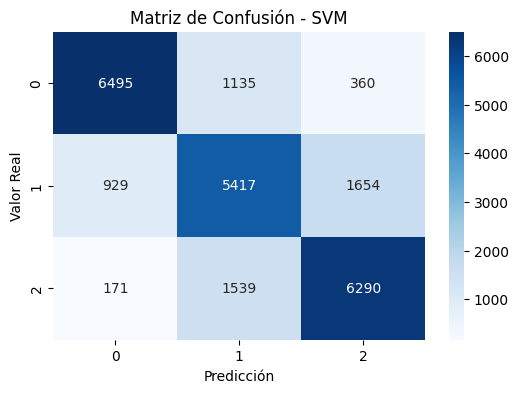

In [127]:
#Confusion Matrix
conf_matrix_svm = confusion_matrix(y_nuevo_svm, y_nuevos_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm_model.classes_, yticklabels=best_svm_model.classes_)
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [ ]:
# Obtener las distancias al hiperplano de decisión
warnings.filterwarnings("ignore")
decision_scores = best_svm_model.decision_function(X_scaled_nuevo_svm)

print("Scores de decisión (primeras filas):")
print(decision_scores[:5])

c:\Users\Propietario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Scores de decisión (primeras filas):
[[-0.24377988  1.04460934  2.23990158]
 [-0.24903831  0.96372163  2.25156368]
 [-0.2009259   2.21527579  0.92189896]
 [-0.2090191   1.13556405  2.16632525]
 [ 2.21499051  1.13531222 -0.23809518]]


-------

### KNN (con preprocesado PCA)

Variables seleccionadas con feature importance en XGBoost. Se excluye también energy porque se había comprobado multicolinealidad con variables como loudness y acousticness y este es un modelo sensible a la relación entre variables predictoras.

In [134]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [136]:
X_knn = df[['duration_ms', 'acousticness', 'danceability', 'instrumentalness',
          'loudness', 'speechiness', 'valence', 'tempo', 'popularity_normalized']]
y_knn = df['decade_label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_knn)

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Varianza acumulada hasta el último componente:", cumulative_variance[-1])

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_knn, test_size=0.2, random_state=42)

model_knn = KNeighborsClassifier(n_neighbors=10)

model_knn.fit(X_train_pca, y_train)

y_pred_pca = model_knn.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')

print(f"Accuracy: {accuracy_pca}")
print(f"Precision: {precision_pca}")
print(f"Recall: {recall_pca}")
print(f"F1-Score: {f1_pca}")

Varianza acumulada hasta el último componente: 0.9627966010745087
Accuracy: 0.6402667778240934
Precision: 0.6376821535367032
Recall: 0.6396321968857577
F1-Score: 0.6339930101430822


#### Evaluación en datos no vistos

In [137]:
X_knn_nuevo = df_test[['duration_ms', 'acousticness', 'danceability', 'instrumentalness',
          'loudness', 'speechiness', 'valence', 'tempo', 'popularity_normalized']]
y_knn_nuevo = df_test['decade_label']

X_new_scaled = scaler.transform(X_knn_nuevo)

X_new_pca = pca.transform(X_new_scaled)

y_new_pred = model_knn.predict(X_new_pca)

accuracy_nuevo_knn = accuracy_score(y_knn_nuevo, y_new_pred)
precision_nuevo_knn = precision_score(y_knn_nuevo, y_new_pred, average='macro')
recall_nuevo_knn = recall_score(y_knn_nuevo, y_new_pred, average='macro')
f1_nuevo_knn = f1_score(y_knn_nuevo, y_new_pred, average='macro')

print("Resultados en datos no vistos:")
print(f"Accuracy: {accuracy_nuevo_knn}")
print(f"Precision: {precision_nuevo_knn}")
print(f"Recall: {recall_nuevo_knn}")
print(f"F1-Score: {f1_nuevo_knn}")

Resultados en datos no vistos:
Accuracy: 0.6443518132555232
Precision: 0.6425484440769725
Recall: 0.6444311118064247
F1-Score: 0.6387397048216948


In [138]:
#Classification Report
print("\nReporte de clasificación:")
print(classification_report(y_knn_nuevo, y_new_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      7990
           1       0.57      0.56      0.56      8000
           2       0.67      0.54      0.60      8000

    accuracy                           0.64     23990
   macro avg       0.64      0.64      0.64     23990
weighted avg       0.64      0.64      0.64     23990



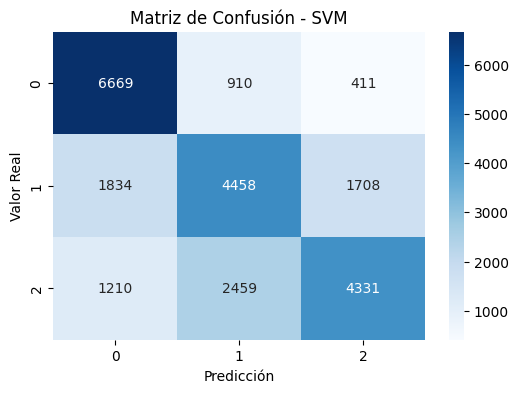

In [139]:
#Confusion Matrix
conf_matrix_knn = confusion_matrix(y_knn_nuevo, y_new_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=model_knn.classes_, yticklabels=model_knn.classes_)
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

----

### Evaluación del modelo elegido en canciones actuales

In [143]:
df_tracks = pd.read_csv("../data/processed/actual_tracks_processed.csv")

In [144]:
df_tracks.head(5)

,Unnamed: 0,id,name,artists,duration_ms,release_date,year,popularity,explicit,acousticness,...,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,decade_label,popularity_normalized
0,0,2kJRlOyrxsy7Ot3c5TZ8Q6,Meu Pedaço de Pecado,João Gomes,157175,2021-06-01,2021,0,False,0.36900,...,0.000001,0.2570,-4.404,0.0564,151.920,0.9070,0,11,2020,-3.822324
1,2,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,200040,2020-03-20,2020,88,False,0.00143,...,0.000095,0.0897,-5.940,0.0598,171.001,0.3340,1,1,2020,0.895673
2,4,5CZ40GBx1sQ9agT82CLQCT,traitor,Olivia Rodrigo,229226,2021-05-21,2021,83,False,0.69100,...,0.000000,0.1200,-7.885,0.0338,100.607,0.0849,1,3,2020,0.627605
3,5,6Uj1ctrBOjOas8xZXGqKk4,Woman,Doja Cat,172626,2021-06-25,2021,82,True,0.08880,...,0.002940,0.1170,-4.175,0.0854,107.998,0.8810,0,5,2020,0.573992
4,7,5QO79kh1waicV47BqGRL3g,Save Your Tears,The Weeknd,215626,2020-03-20,2020,84,True,0.02120,...,0.000012,0.5430,-5.487,0.0309,118.049,0.6440,1,0,2020,0.681219


In [145]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             296 non-null    int64  
 1   id                     296 non-null    object 
 2   name                   296 non-null    object 
 3   artists                296 non-null    object 
 4   duration_ms            296 non-null    int64  
 5   release_date           296 non-null    object 
 6   year                   296 non-null    int64  
 7   popularity             296 non-null    int64  
 8   explicit               296 non-null    bool   
 9   acousticness           296 non-null    float64
 10  danceability           296 non-null    float64
 11  energy                 296 non-null    float64
 12  instrumentalness       296 non-null    float64
 13  liveness               296 non-null    float64
 14  loudness               296 non-null    float64
 15  speech

In [146]:
X_actual_tracks = df_tracks[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
                             'loudness', 'speechiness', 'valence', 'tempo', 'popularity_normalized']]

In [147]:
df_tracks['predicted_decade'] = best_model_xgb.predict(X_actual_tracks)

In [149]:
print(df_tracks[['name', 'artists', 'predicted_decade']].head(10))

                    name         artists  predicted_decade
0   Meu Pedaço de Pecado      João Gomes                 2
1        Blinding Lights      The Weeknd                 2
2                traitor  Olivia Rodrigo                 2
3                  Woman        Doja Cat                 1
4        Save Your Tears      The Weeknd                 2
5      Happier Than Ever   Billie Eilish                 0
6                deja vu  Olivia Rodrigo                 2
7        Don't Start Now        Dua Lipa                 2
8  I WANNA BE YOUR SLAVE        Måneskin                 2
9              telepatía      Kali Uchis                 0


In [151]:
df_tracks['predicted_decade'].value_counts(ascending=False)

predicted_decade
2    214
1     41
0     41
Name: count, dtype: int64

### Gaurdar modelos

In [152]:
import pickle

In [153]:
with open('finalmodel.pkl', 'wb') as f:
    pickle.dump(best_model_xgb, f)

In [155]:
import yaml
best_params_xgb = grid_search_xgb.best_params_
with open("finalmodel_params.yaml", "w") as file:
    yaml.dump(best_params_xgb, file)

In [156]:
with open('XGB.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)